In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="chesterish")

### Row data.csv

In [2]:
root_dir = os.path.dirname(os.getcwd())
data_clean = pd.read_csv("{}/data/data_E2.csv".format(root_dir))
data_clean.head()

,subject_id,rt,stimulus,trial_type,time_elapsed,gender,age,language,country,sampling,turkcode,nb_of_run,responses,stim_type,length,state_OR_event,branch_first,time_interval,node_selected
0,1,NaN,instruction,image-button-response,33515,female,30,English,United States of America,Left,R564336057500gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,instruction,causal-graph2,39587,female,30,English,United States of America,Left,R564336057500gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,instruction,causal-graph2,53665,female,30,English,United States of America,Left,R564336057500gxrw,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,instruction,causal-graph2,56916,female,30,English,United States of America,Left,R564336057500gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,instruction,causal-graph2,88944,female,30,English,United States of America,Left,R564336057500gxrw,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Demographical data only

In [3]:
data_demog = data_clean[["subject_id","gender","age","language","country","turkcode"]]
data_demog.head()

,subject_id,gender,age,language,country,turkcode
0,1,female,30,English,United States of America,R564336057500gxrw
1,1,female,30,English,United States of America,R564336057500gxrw
2,1,female,30,English,United States of America,R564336057500gxrw
3,1,female,30,English,United States of America,R564336057500gxrw
4,1,female,30,English,United States of America,R564336057500gxrw


### Target stimuli only (instructions deleted)

In [4]:
data = data_clean[["subject_id","rt","stimulus","trial_type","sampling","nb_of_run","stim_type","length","state_OR_event",
                   "branch_first","time_interval","node_selected"]]
data = data[data["stimulus"] != "instruction"].drop(['trial_type'],axis=1)
data.reset_index(drop=True,inplace=True)

data.head()

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,length,state_OR_event,branch_first,time_interval,node_selected
0,1,14003.515,branch_LTSE3,Left,4.0,AND_Gate,Short,Event,Top,Long,"[{""selected"":""node6"",""rank"":1}]"
1,1,10760.605,branch_LTMS,Left,1.0,AND_Gate,Medium,State,Top,NaN,"[{""selected"":""node4"",""rank"":2}]"
2,1,10380.485,chain_LS,Left,1.0,Chain,Short,NaN,NaN,NaN,"[{""selected"":""node6"",""rank"":3}]"
3,1,12376.005,branch_LBSE1,Left,1.0,AND_Gate,Short,Event,Bottom,Short,"[{""selected"":""node6"",""rank"":1},{""selected"":""no..."
4,1,18872.180,branch_LBME3,Left,1.0,AND_Gate,Medium,Event,Bottom,Long,"[{""selected"":""node4"",""rank"":2},{""selected"":""no..."


### Chain only

In [5]:
data_chain = data[data["stim_type"]=="Chain"].drop(["stim_type","state_OR_event","branch_first","time_interval"],axis=1)
data_chain.reset_index(drop=True,inplace=True)
data_chain["stimulus"] = data_chain["stimulus"].astype("category")
data_chain["sampling"] = data_chain["sampling"].astype("category")
data_chain["length"] = data_chain["length"].astype("category")

nodes_ranked = []
for row in data_chain['node_selected']:
    sel_rank = json.loads(row)
    nodes_ranked.append(sel_rank)
data_chain['nodes_ranked'] = pd.Series(nodes_ranked)

nodes_selected = []
for item in data_chain['nodes_ranked']:
    nodes = []
    for dictionary in item:
        node = dictionary['selected']
        nodes.append(node)
    nodes_selected.append(nodes)
data_chain['node_selected'] = pd.Series(nodes_selected)
data_chain.rename(columns={'node_selected':'nodes_selected'},inplace=True)
data_chain.head()

,subject_id,rt,stimulus,sampling,nb_of_run,length,nodes_selected,nodes_ranked
0,1,10380.485,chain_LS,Left,1.0,Short,[node6],"[{'selected': 'node6', 'rank': 3}]"
1,1,12000.310,chain_LM,Left,1.0,Medium,"[node3, node4]","[{'selected': 'node3', 'rank': 2}, {'selected'..."
2,1,57229.860,chain_LL,Left,1.0,Long,[node2],"[{'selected': 'node2', 'rank': 1}]"
3,2,10560.000,chain_RS,Right,1.0,Short,[node7],"[{'selected': 'node7', 'rank': 1}]"
4,2,13751.000,chain_RM,Right,1.0,Medium,"[node5, node6, node7]","[{'selected': 'node5', 'rank': 2}, {'selected'..."


### AND-Gate only

In [12]:
data_AND_Gate = data[data["stim_type"]=="AND_Gate"].drop(["stim_type"],axis=1)
data_AND_Gate.reset_index(drop=True,inplace=True)
data_AND_Gate["stimulus"] = data_AND_Gate["stimulus"].astype("category")
data_AND_Gate["state_OR_event"] = data_AND_Gate["state_OR_event"].astype("category")
data_AND_Gate["sampling"] = data_AND_Gate["sampling"].astype("category")
data_AND_Gate["length"] = data_AND_Gate["length"].astype("category")
data_AND_Gate["branch_first"] = data_AND_Gate["branch_first"].astype("category")
data_AND_Gate["time_interval"] = data_AND_Gate["time_interval"].astype("category")
data_AND_Gate["nb_of_run"] = data_AND_Gate["nb_of_run"].astype("category")

nodes_ranked = []
for row in data_AND_Gate['node_selected']:
    sel_rank = json.loads(row)
    nodes_ranked.append(sel_rank)
data_AND_Gate['nodes_ranked'] = pd.Series(nodes_ranked)

nodes_selected = []
for item in data_AND_Gate['nodes_ranked']:
    nodes = []
    for dictionary in item:
        node = dictionary['selected']
        nodes.append(node)
    nodes_selected.append(nodes)
data_AND_Gate['node_selected'] = pd.Series(nodes_selected)
data_AND_Gate.rename(columns={'node_selected':'nodes_selected'},inplace=True)
data_AND_Gate.head()

,subject_id,rt,stimulus,sampling,nb_of_run,length,state_OR_event,branch_first,time_interval,nodes_selected,nodes_ranked
0,1,14003.515,branch_LTSE3,Left,4.0,Short,Event,Top,Long,[node6],"[{'selected': 'node6', 'rank': 1}]"
1,1,10760.605,branch_LTMS,Left,1.0,Medium,State,Top,NaN,[node4],"[{'selected': 'node4', 'rank': 2}]"
2,1,12376.005,branch_LBSE1,Left,1.0,Short,Event,Bottom,Short,"[node6, node13]","[{'selected': 'node6', 'rank': 1}, {'selected'..."
3,1,18872.180,branch_LBME3,Left,1.0,Medium,Event,Bottom,Long,"[node4, node11]","[{'selected': 'node4', 'rank': 2}, {'selected'..."
4,1,15256.415,branch_LTME2,Left,1.0,Medium,Event,Top,Medium,"[node4, node11]","[{'selected': 'node4', 'rank': 3}, {'selected'..."


In [23]:
counts = {'node1':0,'node2':0,'node3':0,'node4':0,'node5':0,'node6':0,'node7':0,'node8':0,'node9':0,'node10':0,'node11':0,
          'node12':0,'node13':0,'node14':0,'node15':0}
for x in data_AND_Gate['nodes_ranked']:
    for y in x:
        if y['rank'] == 1:
            counts[y['selected']]+=1
pd.Series(counts)

node1     35
node2     40
node3     65
node4     57
node5     76
node6     59
node7     85
node8     34
node9     31
node10    60
node11    50
node12    63
node13    50
node14    81
node15    38
dtype: int64

In [20]:
for i in data_AND_Gate[:5]['nodes_ranked']:
    print(i)

[{'selected': 'node6', 'rank': 1}]
[{'selected': 'node4', 'rank': 2}]
[{'selected': 'node6', 'rank': 1}, {'selected': 'node13', 'rank': 2}]
[{'selected': 'node4', 'rank': 2}, {'selected': 'node11', 'rank': 1}]
[{'selected': 'node4', 'rank': 3}, {'selected': 'node11', 'rank': 1}]


In [8]:
counts

{'node1': 0,
 'node2': 0,
 'node3': 0,
 'node4': 0,
 'node5': 0,
 'node6': 0,
 'node7': 0,
 'node8': 0,
 'node9': 0,
 'node10': 0,
 'node11': 0,
 'node12': 0,
 'node13': 0,
 'node14': 336,
 'node15': 0}

In [8]:
ss

a    3
b    5
c    9
d    1
dtype: int64

In [35]:
data_AND_Gate.head()

,subject_id,rt,stimulus,sampling,nb_of_run,length,state_OR_event,branch_first,time_interval,nodes_ranked,nodes_selected
0,1,14003.515,branch_LTSE3,Left,4.0,Short,Event,Top,Long,"[{'selected': 'node6', 'rank': 1}]",[node6]
1,1,10760.605,branch_LTMS,Left,1.0,Medium,State,Top,NaN,"[{'selected': 'node4', 'rank': 2}]",[node4]
2,1,12376.005,branch_LBSE1,Left,1.0,Short,Event,Bottom,Short,"[{'selected': 'node6', 'rank': 1}, {'selected'...","[node6, node13]"
3,1,18872.180,branch_LBME3,Left,1.0,Medium,Event,Bottom,Long,"[{'selected': 'node4', 'rank': 2}, {'selected'...","[node4, node11]"
4,1,15256.415,branch_LTME2,Left,1.0,Medium,Event,Top,Medium,"[{'selected': 'node4', 'rank': 3}, {'selected'...","[node4, node11]"


In [14]:
data_AND_Gate['length']

0       Short
1      Medium
2       Short
3      Medium
4      Medium
        ...  
331      Long
332     Short
333    Medium
334    Medium
335    Medium
Name: length, Length: 336, dtype: category
Categories (3, object): [Long, Medium, Short]

### General functions

In [467]:
def chain_node_cat(length,node):
    node =  int(node[-1])
    short = {'INACT':[1,2,3,4,5,6],'ROOIMDT':[7],'EFFECT':[8]}
    medium = {'INACT':[1,2,3,4],'ROOT':[5],'INBTW':[6],'IMDT':[7],'EFFECT':[8]}
    long = {'INACT':[1,2],'ROOT':[3],'INBTW':[4,5,6],'IMDT':[7],'EFFECT':[8]}
    category = [cat for cat,nd in (short if length == 'Short' else medium if length == 'Medium' 
                                   else long).items() if node in nd][0]
    
    return category

def branch_node_cat(length,node,first):
    node = int(node[-1]) if len(node) == 5 else int(node[-2:])
    short_top = {'INACT_1st':[1,2,3,4,5,6],'INACT_2nd':[8,9,10,11,12,13],'ROOIMDT_1st':[7],'ROOIMDT_2nd':[14],'EFFECT':[15]}
    short_bot = {'INACT_1st':[8,9,10,11,12,13],'INACT_2nd':[1,2,3,4,5,6],'ROOIMDT_1st':[14],'ROOIMDT_2nd':[7],'EFFECT':[15]}
    medium_top = {'INACT_1st':[1,2,3,4],'INACT_2nd':[8,9,10,11],'ROOT_1st':[5],'ROOT_2nd':[12],'INBTW_1st':[6],'INBTW_2nd':[13],
                  'IMDT_1st':[7],'IMDT_2nd':[14],'EFFECT':[15]}
    medium_bot = {'INACT_1st':[8,9,10,11],'INACT_2nd':[1,2,3,4],'ROOT_1st':[12],'ROOT_2nd':[5],'INBTW_1st':[13],'INBTW_2nd':[6],
                  'IMDT_1st':[14],'IMDT_2nd':[7],'EFFECT':[15]}
    long_top = {'INACT_1st':[1,2],'INACT_2nd':[8,9],'ROOT_1st':[3],'ROOT_2nd':[10],'INBTW_1st':[4,5,6],'INBTW_2nd':[11,12,13],
                  'IMDT_1st':[7],'IMDT_2nd':[14],'EFFECT':[15]}
    long_bot = {'INACT_1st':[8,9],'INACT_2nd':[1,2],'ROOT_1st':[10],'ROOT_2nd':[3],'INBTW_1st':[11,12,13],'INBTW_2nd':[4,5,6],
                  'IMDT_1st':[14],'IMDT_2nd':[7],'EFFECT':[15]}
    if length == 'Short':
        category = [cat for cat,nd in (short_top if first == 'Top' else short_bot).items() if node in nd][0]
    elif length == 'Medium':
        category = [cat for cat,nd in (medium_top if first == 'Top' else medium_bot).items() if node in nd][0]
    elif length == 'Long':
        category = [cat for cat,nd in (long_top if first == 'Top' else long_bot).items() if node in nd][0]
    
    return category

class AndGate(object):

    def __init__(self,length=None):
        if length == "short":
            data = data_AND_Gate[data_AND_Gate["length"]=="Short"]
        elif length == "medium":
            data = data_AND_Gate[data_AND_Gate["length"]=="Medium"]
        elif length == "long":
            data = data_AND_Gate[data_AND_Gate["length"]=="Long"]
            
        self.df = data
        
        #self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        #values = {}
        #nodes = ["node"+str(i+1) for i in range(15)]
        #for item in nodes:
            #if item not in self.node_select.keys():
                #values[item] = 0
            #else:
                #values[item] = self.node_select[item]
        #self.node_select = pd.Series(values)
        
        #self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        #values = {}
        #if length == 'short':
            #cats = ['INACT_1st','INACT_2nd','ROOIMDT_1st','ROOIMDT_2nd','EFFECT']
        #else:
            #cats = ['INACT_1st','INACT_2nd','ROOT_1st','ROOT_2nd','INBTW_1st','INBTW_2nd','IMDT_1st','IMDT_2nd','EFFECT']
        #for item in cats:
            #if item not in self.node_category.keys():
                #values[item] = 0
            #else:
                #values[item] = self.node_category[item]
        #self.node_category = pd.Series(values)
        
    def add_filter(self,sampling=None,level=None,delay=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
        if level == "top":
            self.df = self.df[self.df["branch_first"]=="Top"]
        elif level == "bottom":
            self.df = self.df[self.df["branch_first"]=="Bottom"]
        if delay == "short":
            self.df = self.df[self.df["time_interval"]=="Short"]
        elif delay == "medium":
            self.df = self.df[self.df["time_interval"]=="Medium"]
        elif delay == "long":
            self.df = self.df[self.df["time_interval"]=="Long"]
        elif delay == False:
            self.df = self.df[self.df["state_OR_event"]=="State"]
        elif delay == True:
            self.df = self.df[self.df["state_OR_event"]=="Event"]
        
        #self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        #values = {}
        #nodes = ["node"+str(i+1) for i in range(15)]
        #for item in nodes:
            #if item not in self.node_select.keys():
                #values[item] = 0
            #else:
                #values[item] = self.node_select[item]
        #self.node_select = pd.Series(values)
        
        #length = self.df['length'].cat.remove_unused_categories().cat.categories[0]
        #self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        #values = {}
        #if length == 'Short':
            #cats = ['INACT_1st','INACT_2nd','ROOIMDT_1st','ROOIMDT_2nd','EFFECT']
        #else:
            #cats = ['INACT_1st','INACT_2nd','ROOT_1st','ROOT_2nd','INBTW_1st','INBTW_2nd','IMDT_1st','IMDT_2nd','EFFECT']
        #for item in cats:
            #if item not in self.node_category.keys():
                #values[item] = 0
            #else:
                #values[item] = self.node_category[item]
        #self.node_category = pd.Series(values)
        
        return self
    
    def ranking(self,value=1,output='ranking',normalized=True):
        if normalized not in {True,False}:
            raise ValueError('"normalized" has to be True or False')
        length = self.df.iloc[0]['length']
        if  length == 'Short':
            counts = {'INACT_1st':0,'INACT_2nd':0,'ROOIMDT_1st':0,'ROOIMDT_2nd':0,'EFFECT':0}
            details = {'INACT':{'1st':[0],'2nd':[0],'3d':[0],'4th':[0],'5th':[0],'last':[0]},'INACT_1st':{'1st':[0,'node1'],'2nd':[0,'node2'],'3d':[0,'node3'],
                                                                     '4th':[0,'node4'],'5th':[0,'node5'],'last':[0,'node6']},
                       'INACT_2nd':{'1st':[0,'node8'],'2nd':[0,'node9'],'3d':[0,'node10'],'4th':[0,'node11'],'5th':[0,'node12']
                                    ,'last':[0,'node13']}}
        else:
            counts = {'INACT_1st':0,'INACT_2nd':0,'ROOT_1st':0,'ROOT_2nd':0,'INBTW_1st':0,'INBTW_2nd':0,
                      'IMDT_1st':0,'IMDT_2nd':0,'EFFECT':0}
            if length == 'Medium':
                details = {'INACT':{'1st':[0],'2nd':[0],'3d':[0],'last':[0]},'INACT_1st':{'1st':[0,'node1'],'2nd':[0,'node2'],'3d':[0,'node3'],'last':[0,'node4']},
                           'INACT_2nd':{'1st':[0,'node8'],'2nd':[0,'node9'],'3d':[0,'node10'],'last':[0,'node11']}}
            elif length == 'Long':
                details = {'INACT':{'1st':[0],'last':[0]},'INACT_1st':{'1st':[0,'node1'],'last':[0,'node1']},'INACT_2nd':{'1st':[0,'node8'],'last':[0,'node9']},
                           'INBTW_1st':{'1st':[0,'node4'],'2nd':[0,'node5'],'last':[0,'node6']},
                           'INBTW_2nd':{'1st':[0,'node11'],'2nd':[0,'node12'],'last':[0,'node13']}}
            
        for idx, x in enumerate(self.df['nodes_ranked']):
            for y in x:
                if y['rank'] == value:
                    category = branch_node_cat(self.df.iloc[idx]['length'],y['selected'],self.df.iloc[idx]['branch_first'])
                    counts.update({category:counts[category]+1})
                    if category in details.keys():
                        for item in details[category].values():
                            if y['selected'] in item:
                                item[0] += 1
        total = np.array(list(counts.values())).sum()
        if normalized == True and total != 0:
            counts.update({k:counts[k]/total*100 for k in counts.keys()})
        for item in details:
            details[item].update({k:details[item][k][0] for k in details[item].keys()})
            total = np.array(list(details[item].values())).sum()
        details['INACT'].update({k:details['INACT_1st'][k]+details['INACT_2nd'][k] for k in details['INACT'].keys()})  
        if normalized == True and total != 0:
            for item in details:
                details[item].update({k:details[item][k]/total*100 for k in details[item].keys()})
        details.update({item:pd.Series(details[item]) for item in details.keys()})
        counts = pd.Series(counts)
        
        if output=='ranking':
            return counts
        elif output=='broad_cat':
            return list(details.keys())
        else:
            try:
                return details[output]
            except KeyError:
                print("Error! Category '{}' contains only one detector or doesn't exist.\n\nList of availible categories containing more than one detector:{}".format(output,list(details.keys())))
    
class Chain(object):
    def __init__(self,length=None):
        if length == "short":
            data = data_chain[data_chain["length"]=="Short"]
        elif length == "medium":
            data = data_chain[data_chain["length"]=="Medium"]
        elif length == "long":
            data = data_chain[data_chain["length"]=="Long"]
            
        self.df = data
        
        #self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        #values = {}
        #nodes = ["node"+str(i+1) for i in range(8)]
        #for item in nodes:
            #if item not in self.node_select.keys():
                #values[item] = 0
            #else:
                #values[item] = self.node_select[item]
        #self.node_select = pd.Series(values)
        
        #self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        #values = {}
        #if length == 'short':
            #cats = ['INACT','ROIMDT','EFFECT']
        #else:
            #cats = ['INACT','ROOT','INBTW','IMDT','EFFECT']
        #for item in cats:
            #if item not in self.node_category.keys():
                #values[item] = 0
            #else:
                #values[item] = self.node_category[item]
        #self.node_category = pd.Series(values)
        
    def add_filter(self,sampling=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
            
        #self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        #values = {}
        #nodes = ["node"+str(i+1) for i in range(8)]
        #for item in nodes:
            #if item not in self.node_select.keys():
                #values[item] = 0
            #else:
                #values[item] = self.node_select[item]
        #self.node_select = pd.Series(values)
        
        #length = self.df['length'].cat.remove_unused_categories().cat.categories[0]
        #self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        #values = {}
        #if length == 'Short':
            #cats = ['INACT','ROIMDT','EFFECT']
        #else:
            #cats = ['INACT','ROOT','INBTW','IMDT','EFFECT']
        #for item in cats:
            #if item not in self.node_category.keys():
                #values[item] = 0
            #else:
                #values[item] = self.node_category[item]
        #self.node_category = pd.Series(values)
        
        return self
    
    def ranking(self,value=1,output='ranking',normalized=True):
        if normalized not in {True,False}:
            raise ValueError('"normalized" has to be True or False')
        length = self.df.iloc[0]['length']
        if  length == 'Short':
            counts = {'INACT':0,'ROOIMDT':0,'EFFECT':0}
            details = {'INACT':{'1st':[0,'node1'],'2nd':[0,'node2'],'3d':[0,'node3'],'4th':[0,'node4'],'5th':[0,'node5'],
                                    'last':[0,'node6']}}
        else:
            counts = {'INACT':0,'ROOT':0,'INBTW':0,'IMDT':0,'EFFECT':0}
            if length == 'Medium':
                details = {'INACT':{'1st':[0,'node1'],'2nd':[0,'node2'],'3d':[0,'node3'],'last':[0,'node4']}}
            elif length == 'Long':
                details = {'INACT':{'1st':[0,'node1'],'last':[0,'node1']},'INBTW':{'1st':[0,'node4'],'2nd':[0,'node5'],
                                                                                   'last':[0,'node6']}}

        for idx, x in enumerate(self.df['nodes_ranked']):
            for y in x:
                if y['rank'] == value:
                    category = chain_node_cat(self.df.iloc[idx]['length'],y['selected'])
                    counts.update({category:counts[category]+1})
                    if category in details.keys():
                        for item in details[category].values():
                            if y['selected'] in item:
                                item[0] += 1
        total = np.array(list(counts.values())).sum()
        if normalized == True:
            counts.update({k:counts[k]/total*100 for k in counts.keys()})
        for item in details:
            details[item].update({k:details[item][k][0] for k in details[item].keys()})
            total = np.array(list(details[item].values())).sum()
            if normalized == True:
                details[item].update({k:details[item][k]/total*100 for k in details[item].keys()})
        details.update({item:pd.Series(details[item]) for item in details.keys()})
        counts = pd.Series(counts)

        if output=='ranking':
            return counts
        elif output=='broad_cat':
            return list(details.keys())
        else:
            try:
                return details[output]
            except KeyError:
                print("Error! Category '{}' contains only one detector.\n\nList of availible categories containing more than one detector:{}".format(output,list(details.keys())))
    
def graph(list_of_data,title,x_axis='node_category',rank=1):
    fig = plt.figure(figsize=(6.6*len(list_of_data),5))
    a = str(len(list_of_data))
    for i,x in enumerate(list_of_data):
        axis = fig.add_subplot(int("1"+a+str(i+1)))
        axis.set_ylim([0,110])
        axis.set_ylabel("Percentage of responses")
        axis.label_outer()
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)
        axis.set_title(title[i])
        if x_axis == 'node_selected':
            axis.set_xlabel("Detectors",labelpad=20)
            #x.node_select.plot.bar(ax=axis)  
        elif x_axis == 'node_category':
            axis.set_xlabel("Location of the cause",labelpad=20)
            x.ranking(rank).plot.bar(ax=axis)

In [ ]:
data_chain['node_category'] = data_chain.apply(lambda x: chain_node_cat(x['length'],x['node_selected']),axis=1)
data_chain['node_category'] = data_chain['node_category'].astype('category')
data_AND_Gate['node_category'] = data_AND_Gate.apply(lambda x: branch_node_cat(x['length'],x['node_selected'],
                                                                               x['branch_first']),axis=1)
data_AND_Gate['node_category'] = data_AND_Gate['node_category'].astype('category')

### Comparison Right *vs* Left

In [23]:
ChainShort_L.df

,subject_id,rt,stimulus,sampling,nb_of_run,length,node_selected,node_category
5,2,28076.765,chain_LS,Left,1.0,Short,node3,INACT
10,4,9218.000,chain_LS,Left,1.0,Short,node2,INACT
18,7,19809.000,chain_LS,Left,1.0,Short,node6,INACT
21,8,8273.000,chain_LS,Left,1.0,Short,node7,ROIMDT
26,9,9620.000,chain_LS,Left,1.0,Short,node7,ROIMDT
28,10,15787.425,chain_LS,Left,1.0,Short,node8,EFFECT
31,11,9247.180,chain_LS,Left,1.0,Short,node7,ROIMDT
45,16,14364.370,chain_LS,Left,1.0,Short,node4,INACT
52,18,27122.000,chain_LS,Left,1.0,Short,node4,INACT
58,20,23892.615,chain_LS,Left,1.0,Short,node3,INACT


In [24]:
ChainShort_L.node_select

node1     0.000000
node2     8.333333
node3    16.666667
node4    16.666667
node5     0.000000
node6     8.333333
node7    33.333333
node8    16.666667
dtype: float64

In [202]:
details = {'INACT_1st':{'1st':[12,'node1'],'2nd':[48,'node2'],'3d':[1,'node3'],'last':[89,'node4']},
                           'INACT_2nd':{'1st':[7,'node8'],'2nd':[0,'node9'],'3d':[3,'node10'],'last':[109,'node11']}}

In [407]:
1/1*100

100.0

In [190]:
details['INACT_1st']

1st     12
2nd     48
3d       1
last    89
dtype: int64

In [360]:
a = AndGate('short').add_filter(sampling='left',delay='short',level='top')
b = AndGate('short').add_filter(sampling='right',delay=True)

In [361]:
c = Chain("short").add_filter(sampling="right")
d = Chain("short").add_filter(sampling="left")

In [362]:
c.df

,subject_id,rt,stimulus,sampling,nb_of_run,length,nodes_selected,nodes_ranked
3,2,10560.000,chain_RS,Right,1.0,Short,[node7],"[{'selected': 'node7', 'rank': 1}]"
12,5,11794.460,chain_RS,Right,1.0,Short,"[node5, node6]","[{'selected': 'node5', 'rank': 1}, {'selected'..."
30,11,12083.135,chain_RS,Right,1.0,Short,"[node7, node8]","[{'selected': 'node7', 'rank': 1}, {'selected'..."
37,13,12080.165,chain_RS,Right,1.0,Short,"[node7, node8]","[{'selected': 'node7', 'rank': 1}, {'selected'..."
39,14,31144.365,chain_RS,Right,1.0,Short,"[node7, node8]","[{'selected': 'node7', 'rank': 1}, {'selected'..."
47,16,12134.915,chain_RS,Right,1.0,Short,"[node7, node8]","[{'selected': 'node7', 'rank': 1}, {'selected'..."
50,17,10441.135,chain_RS,Right,1.0,Short,[node7],"[{'selected': 'node7', 'rank': 1}]"
52,18,38222.000,chain_RS,Right,1.0,Short,[node8],"[{'selected': 'node8', 'rank': 1}]"
57,20,16720.655,chain_RS,Right,2.0,Short,[node7],"[{'selected': 'node7', 'rank': 1}]"
60,21,27527.025,chain_RS,Right,1.0,Short,"[node7, node8]","[{'selected': 'node7', 'rank': 1}, {'selected'..."


In [363]:
c.ranking(1)

INACT      35.294118
ROOIMDT    47.058824
EFFECT     17.647059
dtype: float64

In [354]:
d.rank(1)

INACT      65.384615
ROOIMDT    30.769231
EFFECT      3.846154
dtype: float64

In [445]:
c.ranking(1).append(2)

TypeError: cannot concatenate object of type '<class 'int'>'; only Series and DataFrame objs are valid

In [356]:
d.rank(1,'INACT',normalized=False)

1st     2
2nd     2
3d      2
4th     3
5th     3
last    5
dtype: int64

In [291]:
for item in a.df['nodes_ranked']:
    print(item)

[{'selected': 'node7', 'rank': 1}, {'selected': 'node14', 'rank': 2}, {'selected': 'node15', 'rank': 3}]
[{'selected': 'node7', 'rank': 1}, {'selected': 'node14', 'rank': 2}, {'selected': 'node15', 'rank': 3}]
[{'selected': 'node14', 'rank': 1}, {'selected': 'node15', 'rank': 1}]
[{'selected': 'node7', 'rank': 1}]
[{'selected': 'node1', 'rank': 1}, {'selected': 'node2', 'rank': 1}, {'selected': 'node3', 'rank': 1}, {'selected': 'node4', 'rank': 1}, {'selected': 'node5', 'rank': 1}, {'selected': 'node8', 'rank': 1}, {'selected': 'node9', 'rank': 1}, {'selected': 'node10', 'rank': 1}, {'selected': 'node11', 'rank': 1}, {'selected': 'node12', 'rank': 1}, {'selected': 'node13', 'rank': 1}]
[{'selected': 'node7', 'rank': 1}]
[{'selected': 'node7', 'rank': 2}, {'selected': 'node14', 'rank': 1}]


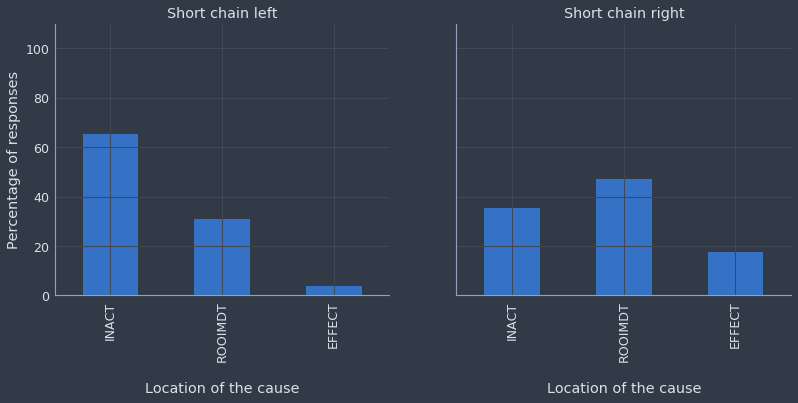

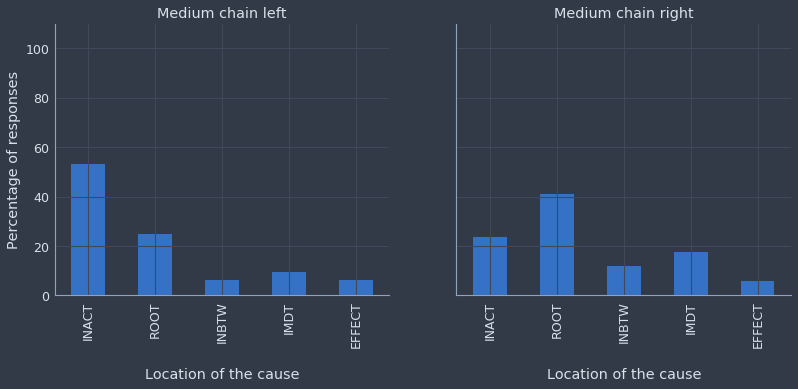

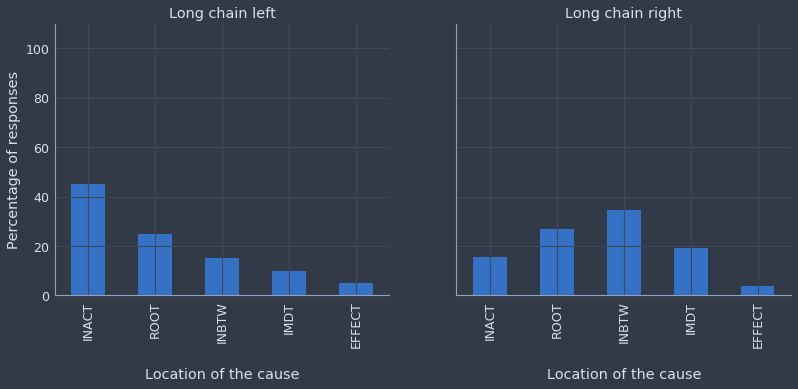

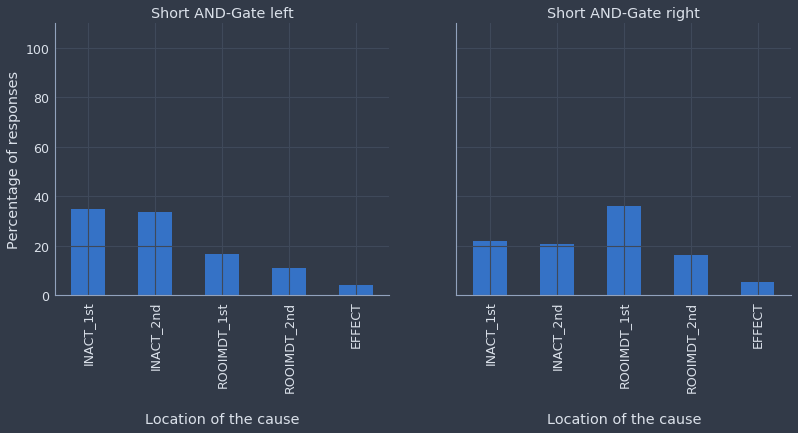

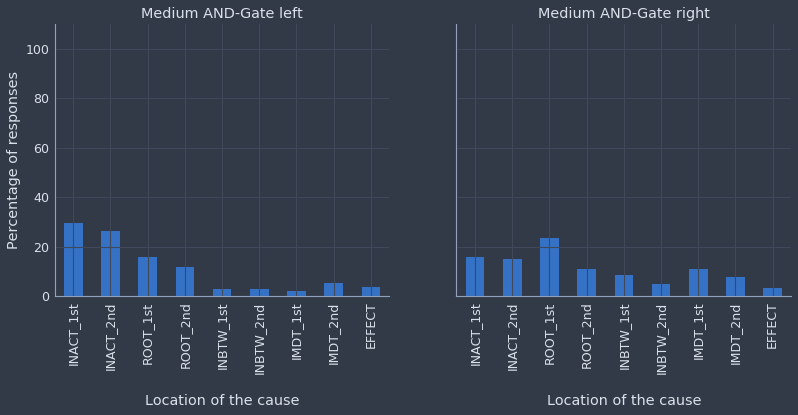

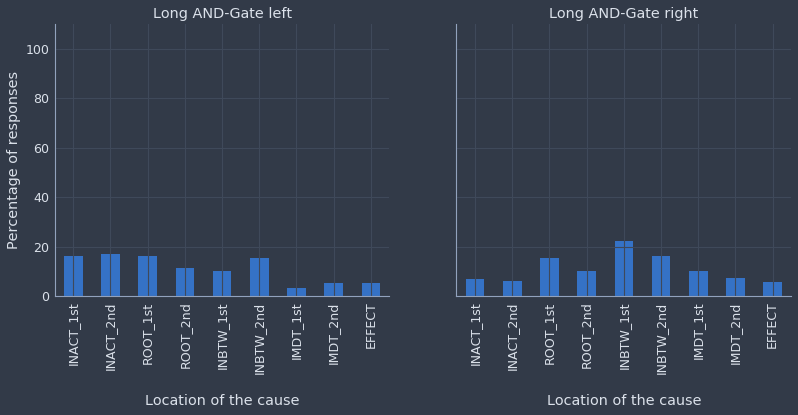

In [365]:
ChainShort_R = Chain("short").add_filter(sampling="right")
ChainMedium_R = Chain("medium").add_filter(sampling="right")
ChainLong_R = Chain("long").add_filter(sampling="right")
ChainShort_L = Chain("short").add_filter(sampling="left")
ChainMedium_L = Chain("medium").add_filter(sampling="left")
ChainLong_L = Chain("long").add_filter(sampling="left")
BranchShort_R = AndGate("short").add_filter(sampling="right")
BranchMedium_R = AndGate("medium").add_filter(sampling="right")
BranchLong_R = AndGate("long").add_filter(sampling="right")
BranchShort_L = AndGate("short").add_filter(sampling="left")
BranchMedium_L = AndGate("medium").add_filter(sampling="left")
BranchLong_L = AndGate("long").add_filter(sampling="left")

graph([ChainShort_L,ChainShort_R],["Short chain left","Short chain right"],rank=1)
graph([ChainMedium_L,ChainMedium_R],["Medium chain left","Medium chain right"],rank=1)
graph([ChainLong_L,ChainLong_R],["Long chain left","Long chain right"],rank=1)
graph([BranchShort_L,BranchShort_R],["Short AND-Gate left","Short AND-Gate right"],rank=1)
graph([BranchMedium_L,BranchMedium_R],["Medium AND-Gate left","Medium AND-Gate right"],rank=1)
graph([BranchLong_L,BranchLong_R],["Long AND-Gate left","Long AND-Gate right"],rank=1)

### Comparison Top *vs* Bottom

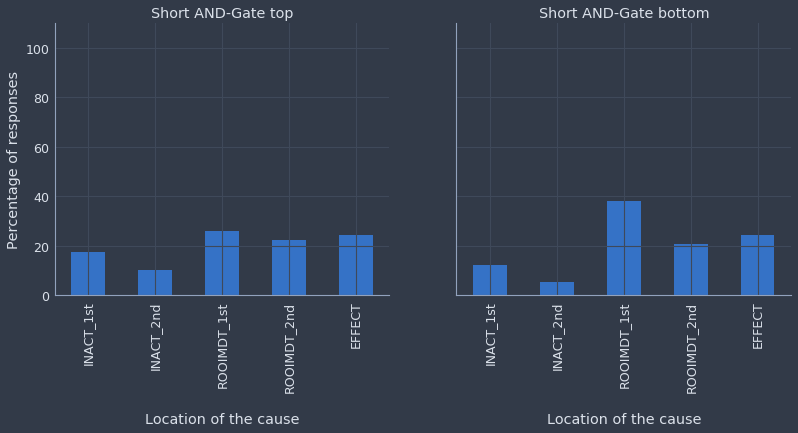

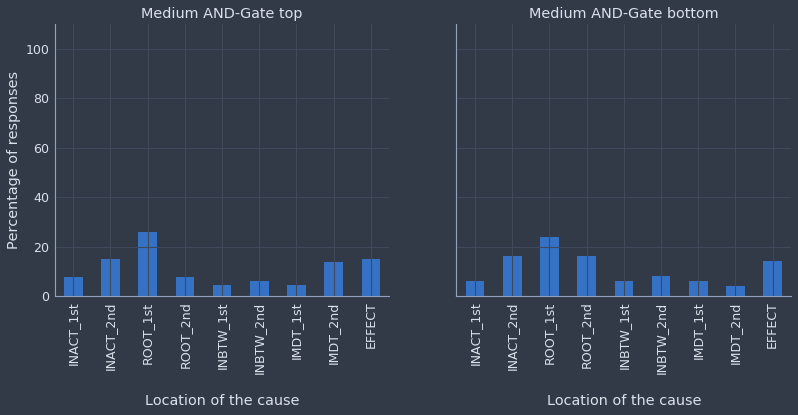

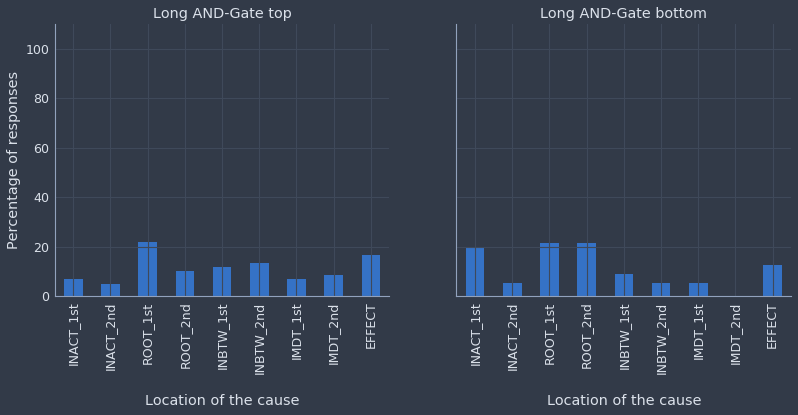

In [11]:
BranchShort_T = AndGate("short").add_filter(level="top")
BranchMedium_T = AndGate("medium").add_filter(level="top")
BranchLong_T = AndGate("long").add_filter(level="top")
BranchShort_B = AndGate("short").add_filter(level="bottom")
BranchMedium_B = AndGate("medium").add_filter(level="bottom")
BranchLong_B = AndGate("long").add_filter(level="bottom")

graph([BranchShort_T,BranchShort_B],["Short AND-Gate top","Short AND-Gate bottom"])
graph([BranchMedium_T,BranchMedium_B],["Medium AND-Gate top","Medium AND-Gate bottom"])
graph([BranchLong_T,BranchLong_B],["Long AND-Gate top","Long AND-Gate bottom"])

### General comparison

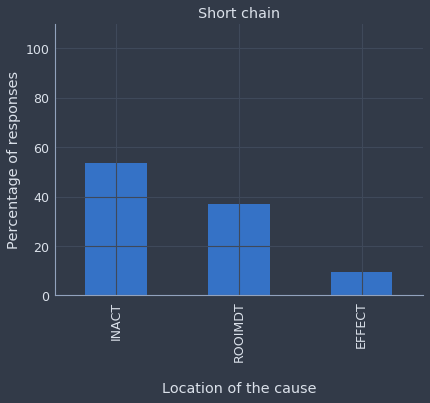

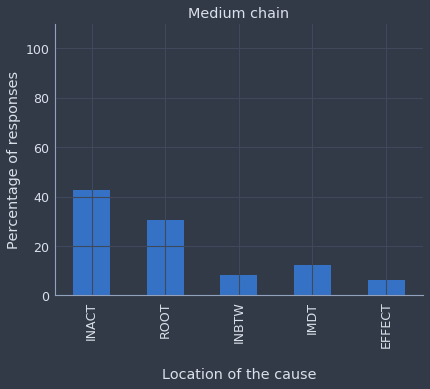

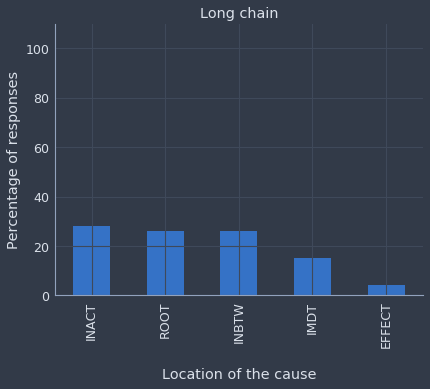

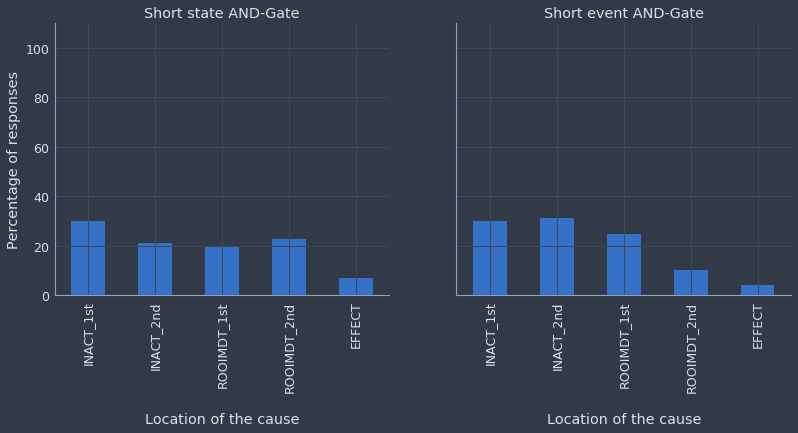

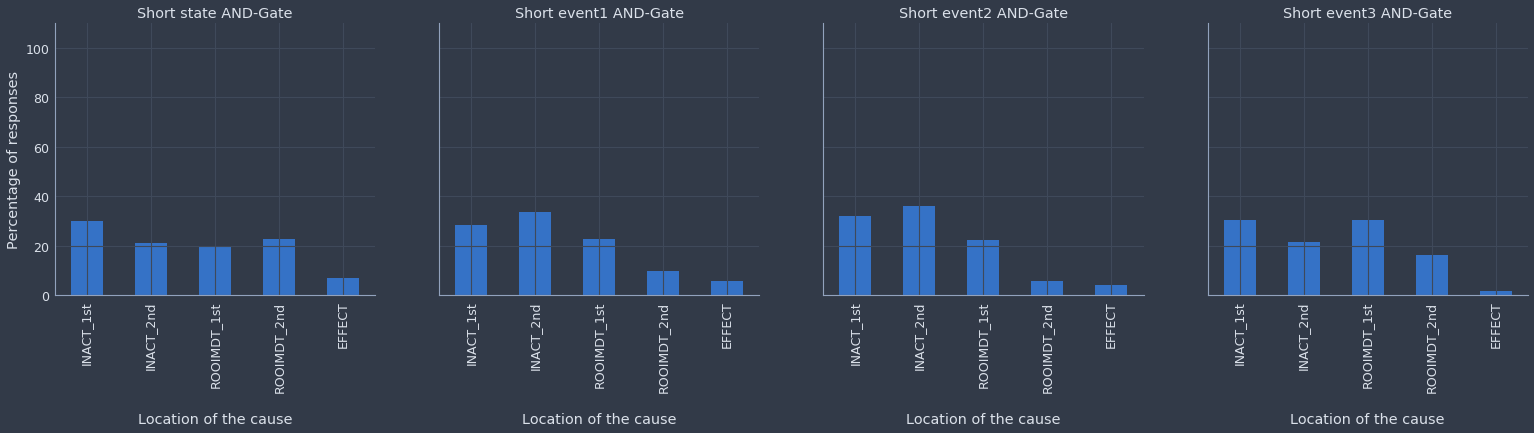

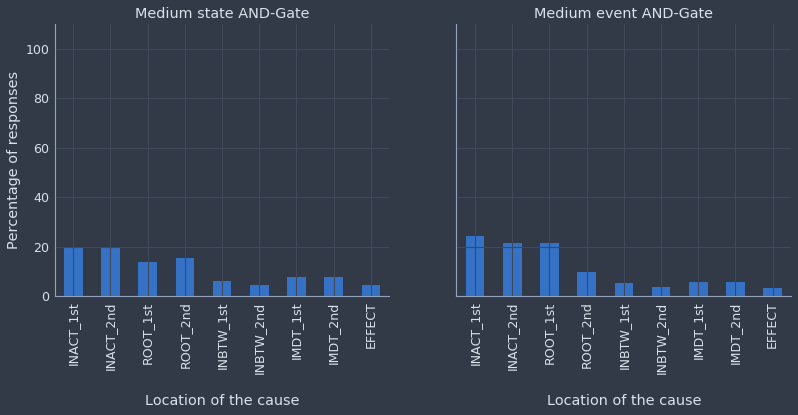

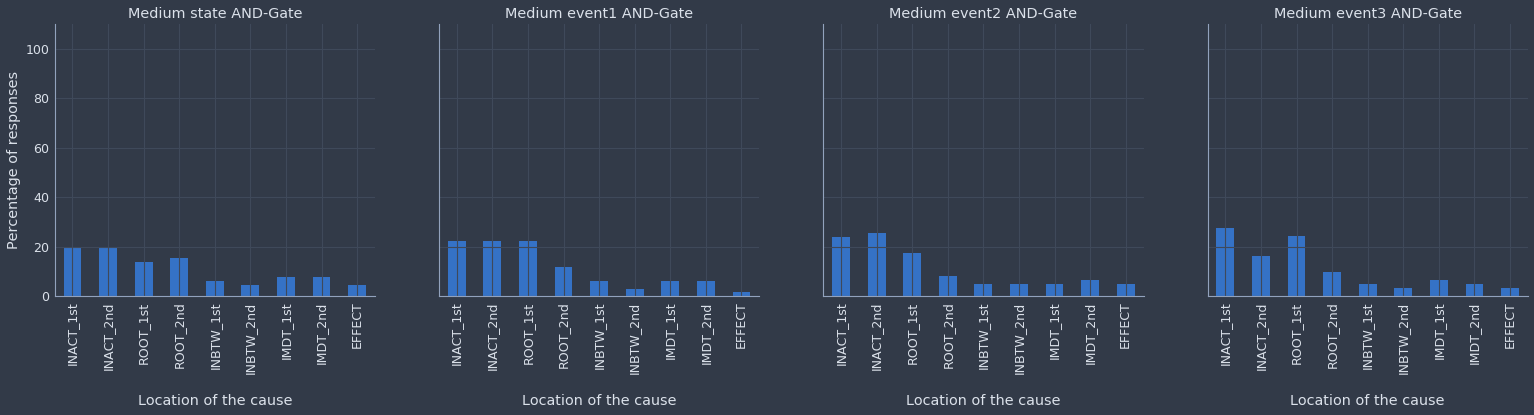

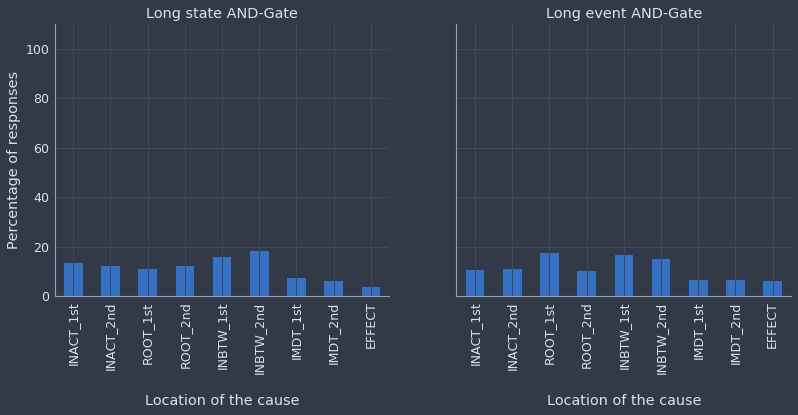

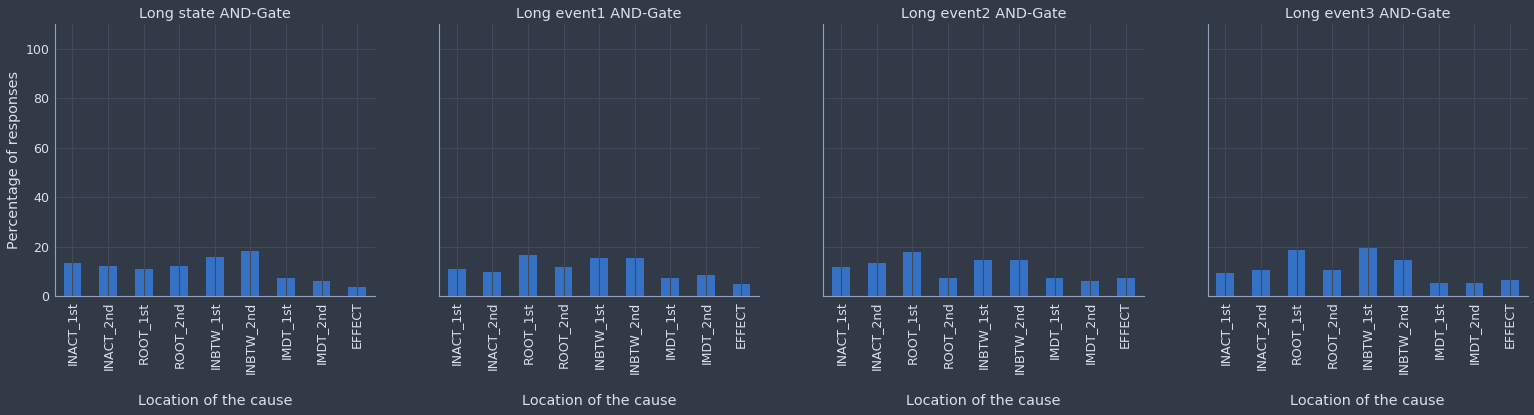

In [468]:
ChainShort = Chain("short").add_filter()
ChainMedium = Chain("medium").add_filter()
ChainLong = Chain("long").add_filter()
ShortState = AndGate("short").add_filter(delay=False)
MediumState = AndGate("medium").add_filter(delay=False)
LongState = AndGate("long").add_filter(delay=False)
ShortEvent = AndGate("short").add_filter(delay=True)
ShortEvent1 = AndGate("short").add_filter(delay="short")
ShortEvent2 = AndGate("short").add_filter(delay="medium")
ShortEvent3 = AndGate("short").add_filter(delay="long")
MediumEvent = AndGate("medium").add_filter(delay=True)
MediumEvent1 = AndGate("medium").add_filter(delay="short")
MediumEvent2  = AndGate("medium").add_filter(delay="medium")
MediumEvent3 = AndGate("medium").add_filter(delay="long")
LongEvent = AndGate('long').add_filter(delay=True)
LongEvent1 = AndGate("long").add_filter(delay="short")
LongEvent2  = AndGate("long").add_filter(delay="medium")
LongEvent3 = AndGate("long").add_filter(delay="long")

graph([ChainShort],["Short chain"],rank=1)
graph([ChainMedium],["Medium chain"],rank=1)
graph([ChainLong],["Long chain"],rank=1)
graph([ShortState,ShortEvent],["Short state AND-Gate","Short event AND-Gate"],rank=1)
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],["Short state AND-Gate","Short event1 AND-Gate",
                                                        "Short event2 AND-Gate","Short event3 AND-Gate"],rank=1)
graph([MediumState,MediumEvent],["Medium state AND-Gate","Medium event AND-Gate"],rank=1)
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],["Medium state AND-Gate","Medium event1 AND-Gate",
                                                        "Medium event2 AND-Gate","Medium event3 AND-Gate"],rank=1)
graph([LongState,LongEvent],["Long state AND-Gate","Long event AND-Gate"],rank=1)
graph([LongState,LongEvent1,LongEvent2,LongEvent3],["Long state AND-Gate","Long event1 AND-Gate",
                                                        "Long event2 AND-Gate","Long event3 AND-Gate"],rank=1)

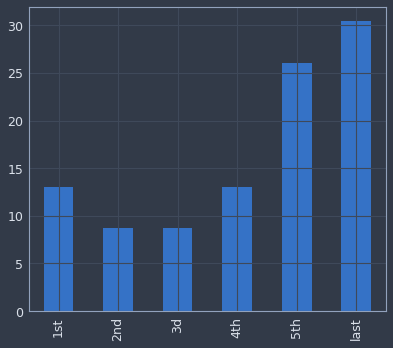

In [469]:
ChainShort.ranking(1,'INACT').plot.bar()

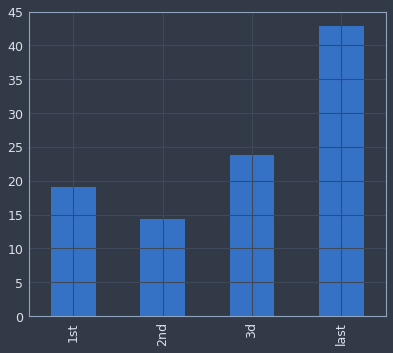

In [470]:
ChainMedium.ranking(1,'INACT').plot.bar()

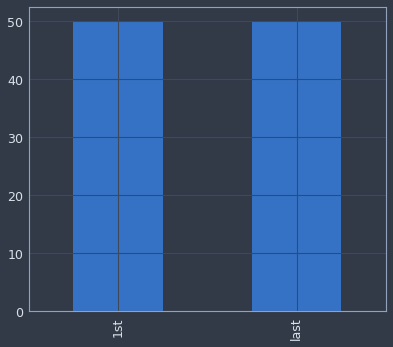

In [471]:
ChainLong.ranking(1,'INACT').plot.bar()

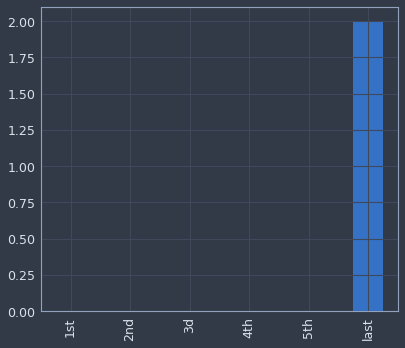

In [472]:
ShortState.ranking(1,'INACT').plot.bar()

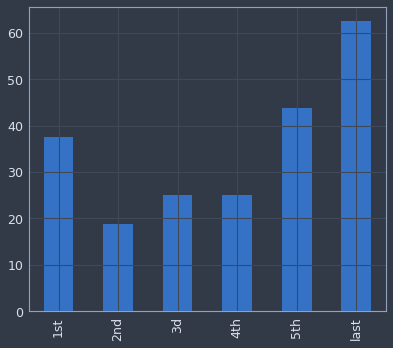

In [473]:
ShortEvent.ranking(1,'INACT').plot.bar()

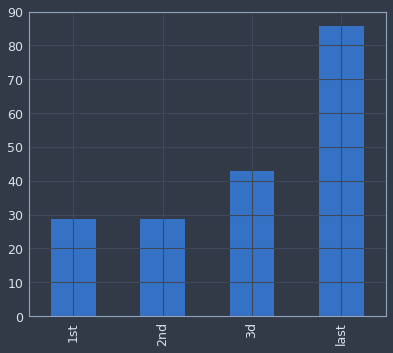

In [474]:
MediumState.ranking(1,'INACT').plot.bar()

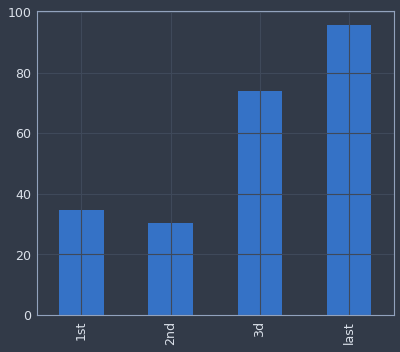

In [475]:
MediumEvent.ranking(1,'INACT').plot.bar()

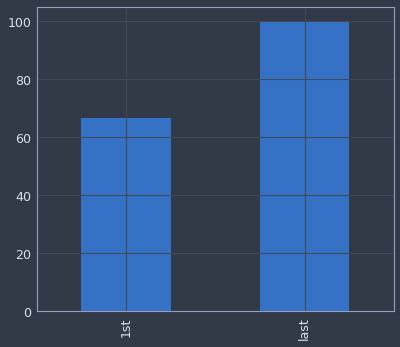

In [476]:
LongState.ranking(1,'INACT').plot.bar()

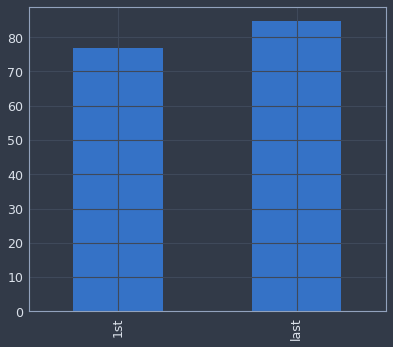

In [477]:
LongEvent.ranking(1,'INACT').plot.bar()

In [22]:
MediumEvent3.node_category

INACT_1st     3.448276
INACT_2nd    20.689655
ROOT_1st     31.034483
ROOT_2nd     10.344828
INBTW_1st     3.448276
INBTW_2nd     0.000000
IMDT_1st      0.000000
IMDT_2nd     17.241379
EFFECT       13.793103
dtype: float64

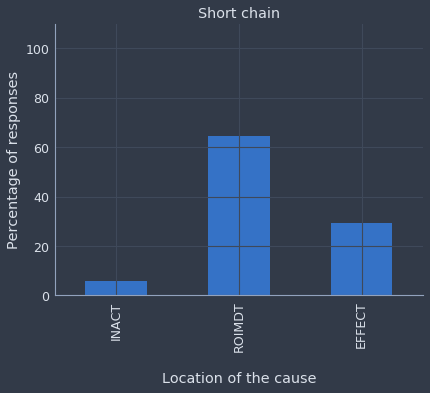

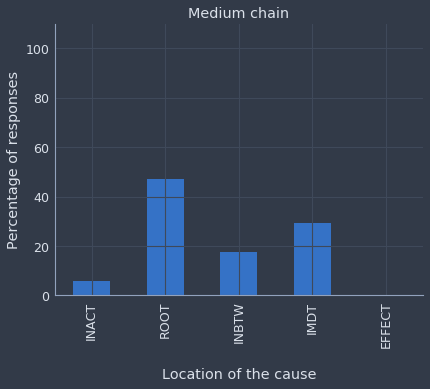

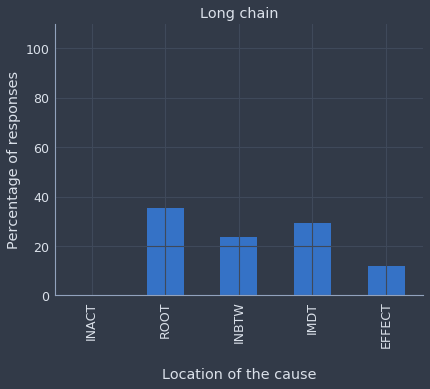

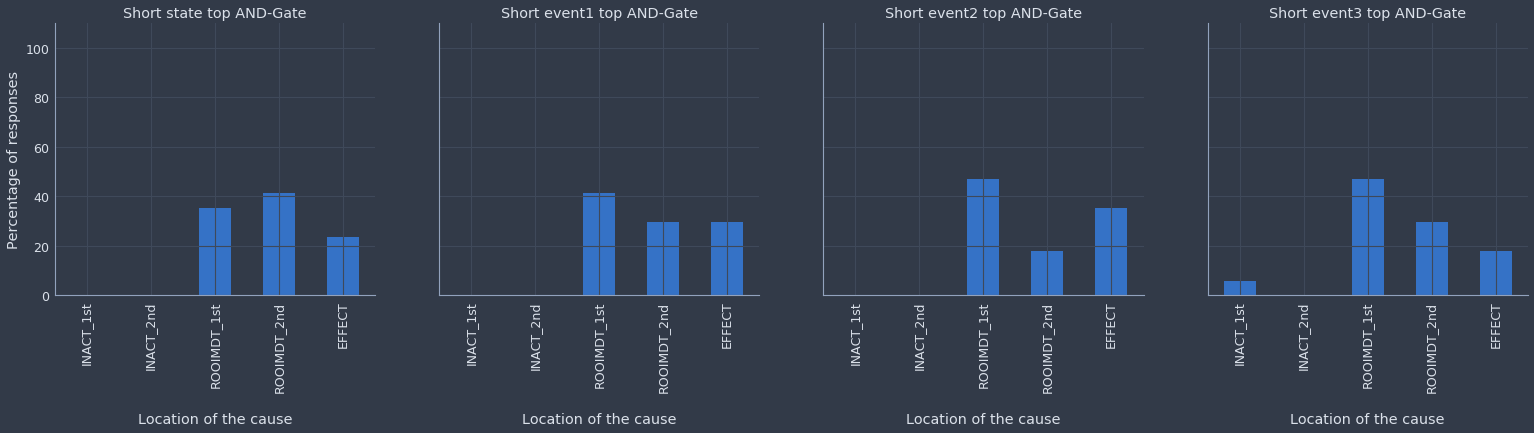

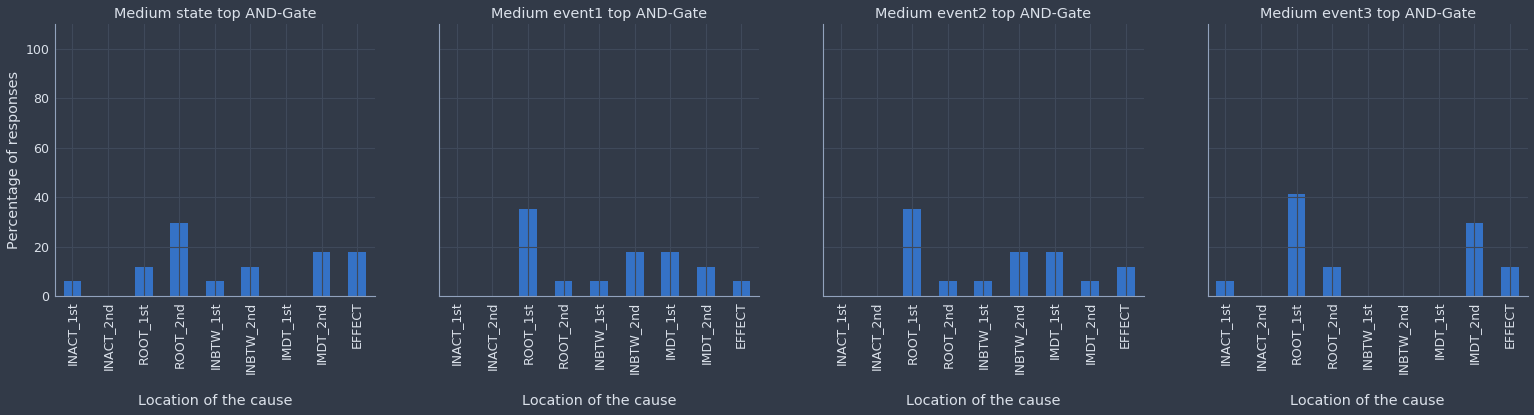

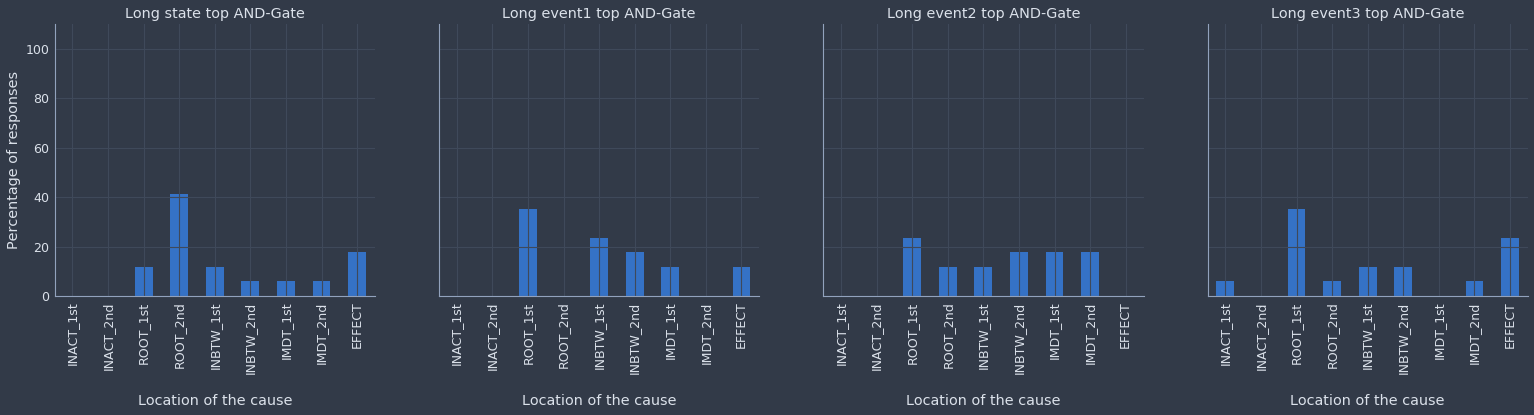

In [13]:
ChainShort = Chain("short").add_filter(sampling='right')
ChainMedium = Chain("medium").add_filter(sampling='right')
ChainLong = Chain("long").add_filter(sampling='right')
ShortState = AndGate("short").add_filter(sampling='right',delay=False)
MediumState = AndGate("medium").add_filter(sampling='right',delay=False)
LongState = AndGate("long").add_filter(sampling='right',delay=False)
ShortEvent1 = AndGate("short").add_filter(sampling='right',delay="short")
ShortEvent2 = AndGate("short").add_filter(sampling='right',delay="medium")
ShortEvent3 = AndGate("short").add_filter(sampling='right',delay="long")
MediumEvent1 = AndGate("medium").add_filter(sampling='right',delay="short")
MediumEvent2  = AndGate("medium").add_filter(sampling='right',delay="medium")
MediumEvent3 = AndGate("medium").add_filter(sampling='right',delay="long")
LongEvent1 = AndGate("long").add_filter(sampling='right',delay="short")
LongEvent2  = AndGate("long").add_filter(sampling='right',delay="medium")
LongEvent3 = AndGate("long").add_filter(sampling='right',delay="long")

graph([ChainShort],["Short chain"])
graph([ChainMedium],["Medium chain"])
graph([ChainLong],["Long chain"])
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],["Short state top AND-Gate","Short event1 top AND-Gate",
                                                        "Short event2 top AND-Gate","Short event3 top AND-Gate"])
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],["Medium state top AND-Gate","Medium event1 top AND-Gate",
                                                        "Medium event2 top AND-Gate","Medium event3 top AND-Gate"])
graph([LongState,LongEvent1,LongEvent2,LongEvent3],["Long state top AND-Gate","Long event1 top AND-Gate",
                                                        "Long event2 top AND-Gate","Long event3 top AND-Gate"])

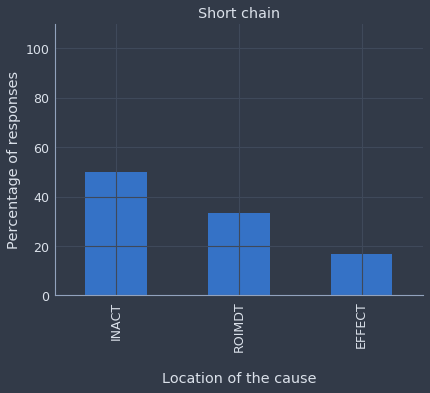

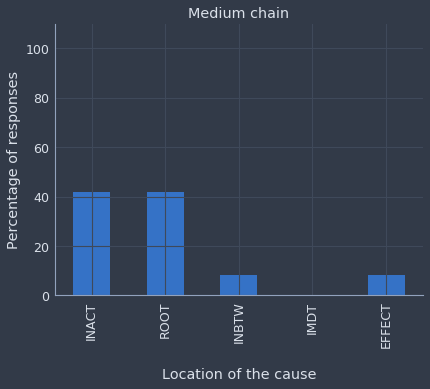

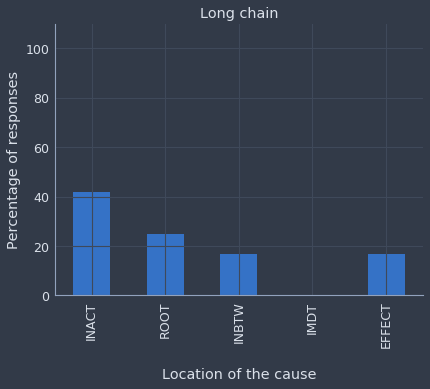

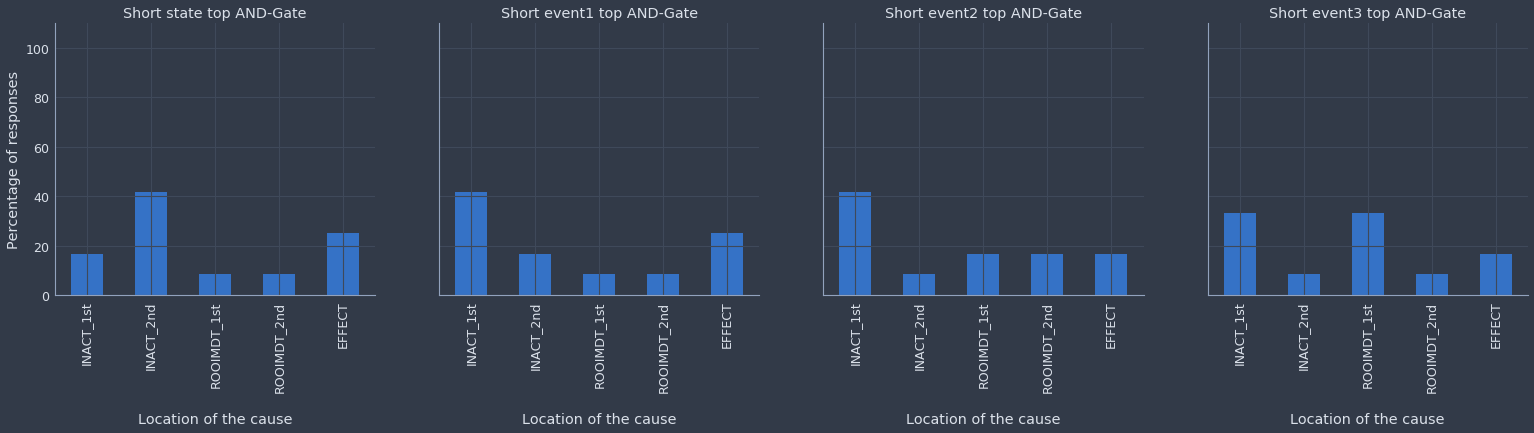

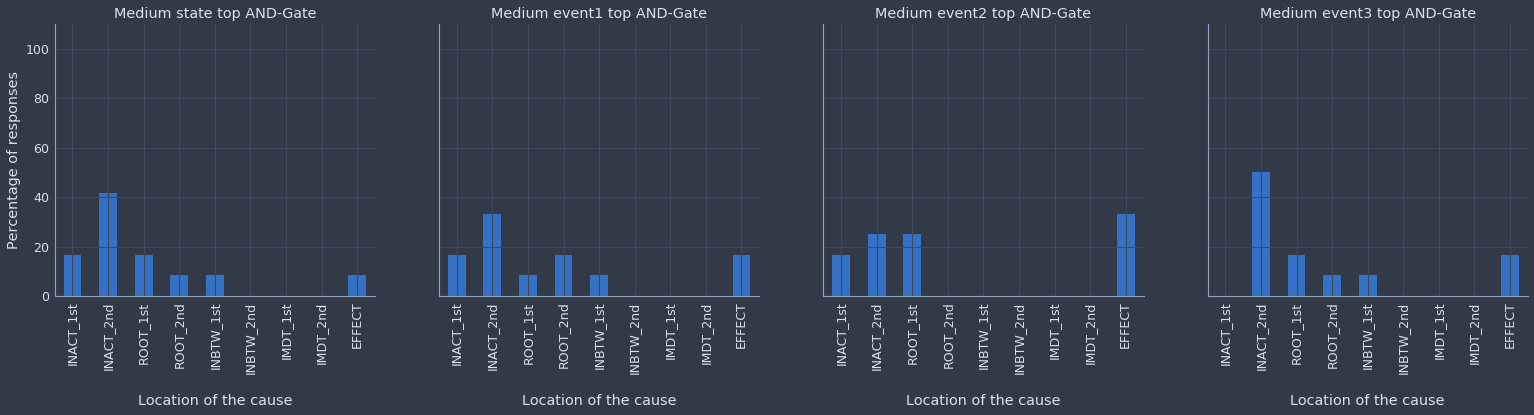

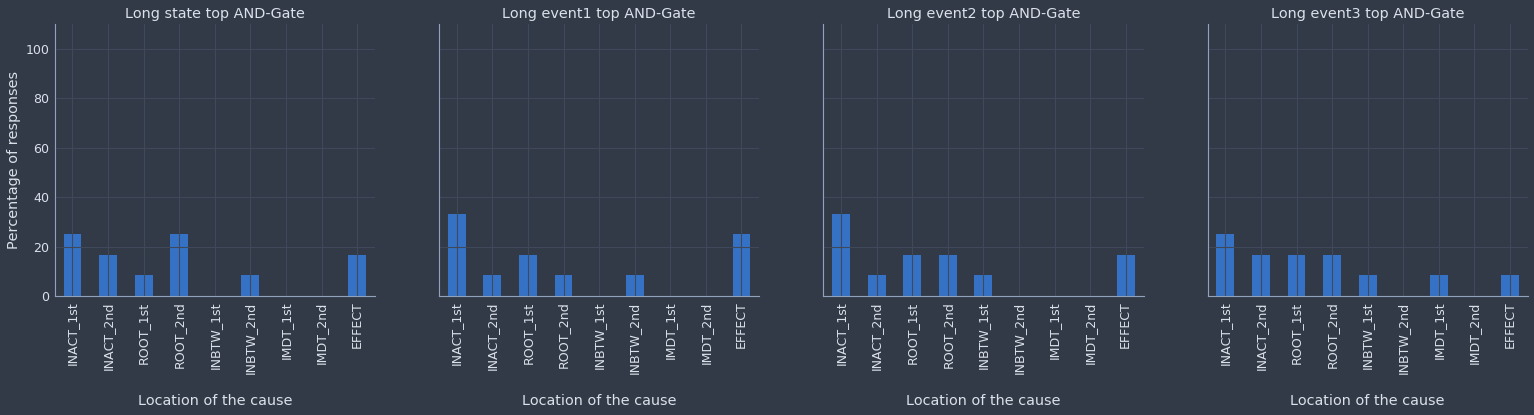

In [14]:
ChainShort = Chain("short").add_filter(sampling='left')
ChainMedium = Chain("medium").add_filter(sampling='left')
ChainLong = Chain("long").add_filter(sampling='left')
ShortState = AndGate("short").add_filter(sampling='left',delay=False)
MediumState = AndGate("medium").add_filter(sampling='left',delay=False)
LongState = AndGate("long").add_filter(sampling='left',delay=False)
ShortEvent1 = AndGate("short").add_filter(sampling='left',delay="short")
ShortEvent2 = AndGate("short").add_filter(sampling='left',delay="medium")
ShortEvent3 = AndGate("short").add_filter(sampling='left',delay="long")
MediumEvent1 = AndGate("medium").add_filter(sampling='left',delay="short")
MediumEvent2  = AndGate("medium").add_filter(sampling='left',delay="medium")
MediumEvent3 = AndGate("medium").add_filter(sampling='left',delay="long")
LongEvent1 = AndGate("long").add_filter(sampling='left',delay="short")
LongEvent2  = AndGate("long").add_filter(sampling='left',delay="medium")
LongEvent3 = AndGate("long").add_filter(sampling='left',delay="long")

graph([ChainShort],["Short chain"])
graph([ChainMedium],["Medium chain"])
graph([ChainLong],["Long chain"])
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],["Short state top AND-Gate","Short event1 top AND-Gate",
                                                        "Short event2 top AND-Gate","Short event3 top AND-Gate"])
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],["Medium state top AND-Gate","Medium event1 top AND-Gate",
                                                        "Medium event2 top AND-Gate","Medium event3 top AND-Gate"])
graph([LongState,LongEvent1,LongEvent2,LongEvent3],["Long state top AND-Gate","Long event1 top AND-Gate",
                                                        "Long event2 top AND-Gate","Long event3 top AND-Gate"])